In [1]:
# in this example we compare 1 CNN Layer with the implimentation of CNN with SWAG.
# we use this dataset CIFAR100 small image classification
# https://keras.io/datasets/
############################################################################
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf


import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################

numpy.random.seed(7)

C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

############################################################################
def X_1(x):
    return (K.pow(x,1))
get_custom_objects().update({'X_1': Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x,2))/2
get_custom_objects().update({'X_2': Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x,3))/6
get_custom_objects().update({'X_3': Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x,4))/24
get_custom_objects().update({'X_4': Activation(X_4)})
############################################################################
def X_5(x):
    return (K.pow(x,5))/120
get_custom_objects().update({'X_5': Activation(X_5)})
###############################################################################


In [3]:
#Creates plot for loss and trainning functions
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

number_train=50000
number_test=10000
X_train=X_train[0:number_train,:,:,:]
y_train=y_train[0:number_train]
X_test=X_test[0:number_test,:,:,:]
y_test=y_test[0:number_test]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 300.0
X_test = X_test / 300.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
epochs=4

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 67s 1ms/step - loss: 1.6796 - acc: 0.4102 - val_loss: 1.5166 - val_acc: 0.4659
Epoch 2/4
50000/50000 [==============================] - 67s 1ms/step - loss: 1.4687 - acc: 0.4893 - val_loss: 1.4273 - val_acc: 0.5004
Epoch 3/4
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4130 - acc: 0.5101 - val_loss: 1.4051 - val_acc: 0.5100
Epoch 4/4
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3797 - acc: 0.5223 - val_loss: 1.3790 - val_acc: 0.5194
Test loss: 1.3789706859588624
Test accuracy: 0.5194


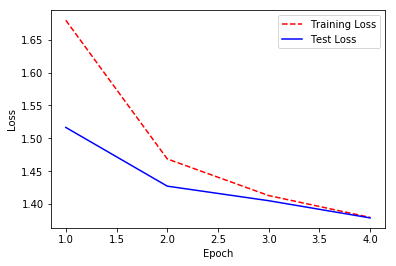

In [6]:

########################################################################
input_img = Input(shape = (32, 32, 3))
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
output = Flatten()(tower_3)
########################################################################
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
########################################################################
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 64)   256         input_2[0][0]                    
__________________________________________________________________________________________________
concatenat

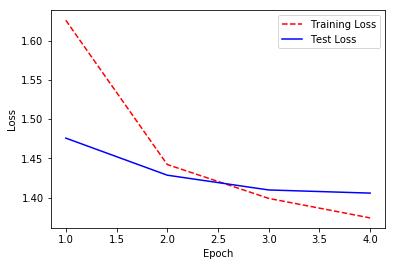

In [7]:

# impliment the CNN layer with SWAG algorithm
# note that these 3 layers must be in 1 Layer . But we do not have this 
# technology right now. So we have to impliment it in this way.
# thats why SWAG is slow in CNN
#please note that in this example we use 3 terms x powr 1 , x power 2, x power 3
# this example is a proof of concept
########################################################################
input_img = Input(shape = (32, 32, 3))
tower_1 = Conv2D(64, (1,1), padding='same', activation='X_1')(input_img)
tower_2 = Conv2D(64, (1,1), padding='same', activation='X_2')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='X_3')(input_img)
concatenate_3_Layers= concatenate([tower_1,tower_2,tower_3])
Out_put_SWAG = Dense(10, activation='linear')(concatenate_3_Layers)
########################################################################
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(Out_put_SWAG)
output = Flatten()(tower_3)
out    = Dense(10, activation='softmax')(output)
model = Model(inputs = input_img, outputs = out)
########################################################################
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)
